In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import pydotplus
from IPython.display import Image
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
import datetime as dt
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [238]:
df = pd.read_excel('C:/Users/sumit/Sumit DATA/datasets/Project/Cleandata7.xlsx')

In [239]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,agreeableness,extraversion,nueroticism,openess_to_experience,Aggregate Mean Marks,Aggregate Max Marks,Aggregate Min Marks,GAP_after_Grad,GAP_in_Grad,Age
0,203097,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,Female,1990-02-19,84.3,State Board,...,0.8128,0.5269,1.35490,-0.4455,445.0,445,445,1,0,25
1,579905,500000,2013-09-01,2015-12-31,assistant manager,indore,Male,1989-10-04,85.4,CBSE,...,0.3789,1.2396,-0.10760,0.8637,466.0,466,466,1,1,26
2,810601,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,CBSE,...,1.7109,0.1637,-0.86820,0.6721,395.0,395,395,0,0,23
3,267447,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,CBSE,...,0.3448,-0.3440,-0.40780,-0.9194,615.0,615,615,0,0,26
4,343523,200000,2014-03-01,2015-03-01,get,manesar,Male,1991-02-27,78.0,CBSE,...,-0.2793,-1.0697,0.09163,-0.1295,233.0,233,233,2,0,24


In [240]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df['Salary'])) < 3)]

In [241]:
df.corr()['Salary']

ID                      -0.316200
Salary                   1.000000
10percentage             0.274999
12graduation            -0.186857
12percentage             0.264188
CollegeID               -0.157779
collegeGPA               0.225736
CollegeCityID           -0.157779
GraduationYear          -0.260668
English                  0.254151
Logical                  0.247790
Quant                    0.353101
Domain                   0.224228
ComputerProgramming      0.294510
ElectronicsAndSemicon    0.114936
ComputerScience          0.201186
MechanicalEngg           0.253169
ElectricalEngg           0.274793
TelecomEngg              0.110847
CivilEngg                0.279326
conscientiousness       -0.063922
agreeableness            0.062280
extraversion            -0.030791
nueroticism             -0.059567
openess_to_experience   -0.008351
Aggregate Mean Marks     0.227374
Aggregate Max Marks      0.206631
Aggregate Min Marks      0.229495
GAP_after_Grad          -0.031487
GAP_in_Grad   

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 0 to 3978
Data columns (total 44 columns):
ID                       3939 non-null int64
Salary                   3939 non-null int64
DOJ                      3939 non-null datetime64[ns]
DOL                      3939 non-null datetime64[ns]
Designation              3939 non-null object
JobCity                  3483 non-null object
Gender                   3939 non-null object
DOB                      3939 non-null datetime64[ns]
10percentage             3939 non-null float64
10board                  3939 non-null object
12graduation             3939 non-null int64
12percentage             3939 non-null float64
12board                  3939 non-null object
CollegeID                3939 non-null int64
CollegeTier              3939 non-null object
Degree                   3939 non-null object
Specialization           3939 non-null object
collegeGPA               3939 non-null float64
CollegeCityID            3939 non-null int

In [243]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Aggregate Mean Marks', 'Aggregate Max Marks', 'Aggregate Min Marks',
       'GAP_after_Grad', 'GAP_in_Grad', 'Age'],
      dtype='object')

In [244]:
df = df.drop(['ID', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'DOB', 'CollegeID', 'CollegeCityID', 'CollegeCityTier',
       'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg','Aggregate Min Marks','Aggregate Max Marks','GAP_after_Grad'],axis=1)

In [245]:
df.head().T

,0,1,2,4,5
Salary,420000,500000,325000,200000,300000
Gender,Female,Male,Female,Male,Male
10percentage,84.3,85.4,85,78,89.92
10board,State Board,CBSE,CBSE,CBSE,State Board
12graduation,2007,2007,2010,2008,2010
12percentage,95.8,85,68.2,76.8,87
12board,State Board,CBSE,CBSE,CBSE,State Board
CollegeTier,Average College,Average College,Average College,Average College,Average College
Degree,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.
Specialization,computer engineering,electronics and communication engineering,information technology,electronics and communication engineering,electronics and communication engineering


In [246]:
df.head()

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Aggregate Mean Marks,GAP_in_Grad,Age
0,420000,Female,84.30,State Board,2007,95.8,State Board,Average College,B.Tech/B.E.,computer engineering,...,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,445.0,0,25
1,500000,Male,85.40,CBSE,2007,85.0,CBSE,Average College,B.Tech/B.E.,electronics and communication engineering,...,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,466.0,1,26
2,325000,Female,85.00,CBSE,2010,68.2,CBSE,Average College,B.Tech/B.E.,information technology,...,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,395.0,0,23
4,200000,Male,78.00,CBSE,2008,76.8,CBSE,Average College,B.Tech/B.E.,electronics and communication engineering,...,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,233.0,0,24
5,300000,Male,89.92,State Board,2010,87.0,State Board,Average College,B.Tech/B.E.,electronics and communication engineering,...,620,0.000000,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,526.0,0,23


In [247]:
df.groupby('12graduation').count()['Salary']

12graduation
2003      24
2004      68
2005     155
2006     399
2007     521
2008     932
2009    1047
2010     738
2011      44
2012      10
2013       1
Name: Salary, dtype: int64

In [248]:
df['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 2004, 2012, 2003, 2013],
      dtype=int64)

In [249]:
from sklearn.preprocessing import LabelEncoder
gender_label = LabelEncoder()
df['Gender'] = gender_label.fit_transform(df['Gender'])
board10 = LabelEncoder()
df['10board'] = board10.fit_transform(df['10board'])
board12 = LabelEncoder()
df['12board'] = board12.fit_transform(df['12board'])
deg = LabelEncoder()
df['Degree'] = deg.fit_transform(df['Degree'])
sep = LabelEncoder()
df['Specialization'] = sep.fit_transform(df['Specialization'])
clostate = LabelEncoder()
df['CollegeState'] = clostate.fit_transform(df['CollegeState'])
wegrad = LabelEncoder()
df['12graduation'] = wegrad.fit_transform(df['12graduation'])
wegradqw = LabelEncoder()
df['GraduationYear'] = wegradqw.fit_transform(df['GraduationYear'])
qwerty = LabelEncoder()
df['CollegeTier'] = qwerty.fit_transform(df['CollegeTier'])

In [250]:
df['12graduation'].unique()

array([ 4,  7,  5,  6,  3,  8,  2,  1,  9,  0, 10], dtype=int64)

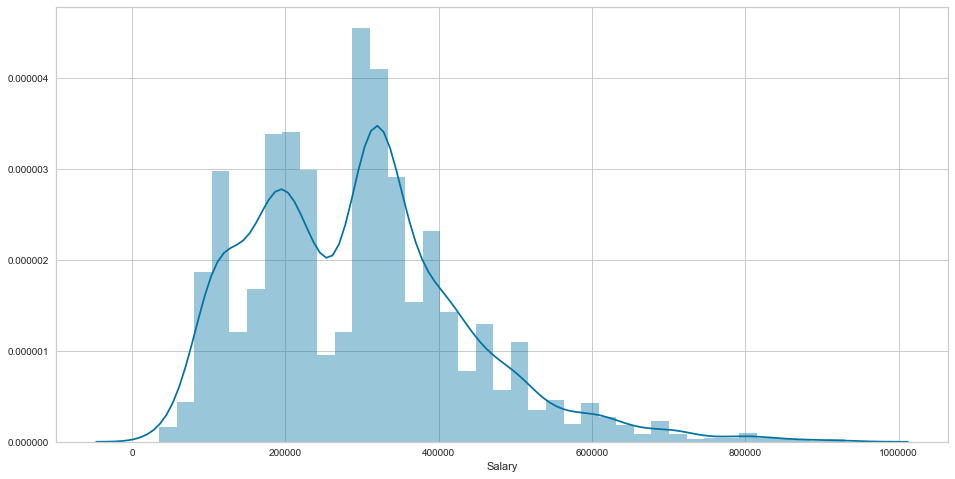

In [251]:
plt.figure(figsize=(16,8))
sns.distplot(df['Salary'])

In [252]:
df1 = df.copy()

In [253]:
df1.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age'],
      dtype='object')

In [254]:
x = df1
x.head()
from scipy.stats import zscore

In [255]:
x = x.apply(zscore)
x.head()

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Aggregate Mean Marks,GAP_in_Grad,Age
0,0.902538,-1.777484,0.645059,0.644250,-0.721635,1.940294,0.640649,-0.279807,-0.274007,-1.069560,...,0.096370,0.214417,0.981170,0.709296,0.552291,1.507413,-0.306493,0.298663,-0.542174,0.279814
1,1.474561,0.562593,0.757339,-1.236225,-0.721635,0.954452,-1.233482,-0.279807,-0.274007,0.095949,...,2.191434,1.287484,-0.681278,0.247907,1.302023,0.058032,0.993758,0.474311,0.853658,0.871433
2,0.223260,-1.777484,0.716510,-1.236225,1.189089,-0.579081,-1.233482,-0.279807,-0.274007,1.367414,...,-1.177101,-0.397449,0.297669,1.664293,0.170219,-0.695745,0.803467,-0.119547,-0.542174,-0.903424
4,-0.670527,0.562593,0.001999,-1.236225,-0.084727,0.205942,-1.233482,-0.279807,-0.274007,0.095949,...,-0.396586,-1.476301,-0.824912,-0.451992,-1.127270,0.255475,0.007347,-1.474546,-0.542174,-0.311805
5,0.044503,0.562593,1.218709,0.644250,1.189089,1.137015,0.640649,-0.279807,-0.274007,0.095949,...,0.876884,-1.887850,-0.261771,-0.814383,-2.416659,-0.570182,-0.718954,0.976162,-0.542174,-0.903424


In [256]:
error = []
numofk = range(1,10)
for i in numofk:
    clusters = KMeans(n_clusters=i,n_init=10)
    clusters.fit(x)
    labels = clusters.labels_
    error.append(clusters.inertia_)
SSE_values = pd.DataFrame({'No.ofK':numofk,'SSE':error})
SSE_values

,No.ofK,SSE
0,1,98475.000000
1,2,88428.843206
2,3,82802.974339
3,4,78961.480045
4,5,75544.771602
5,6,72795.471836
6,7,69784.628069
7,8,68046.545730
8,9,66552.504649


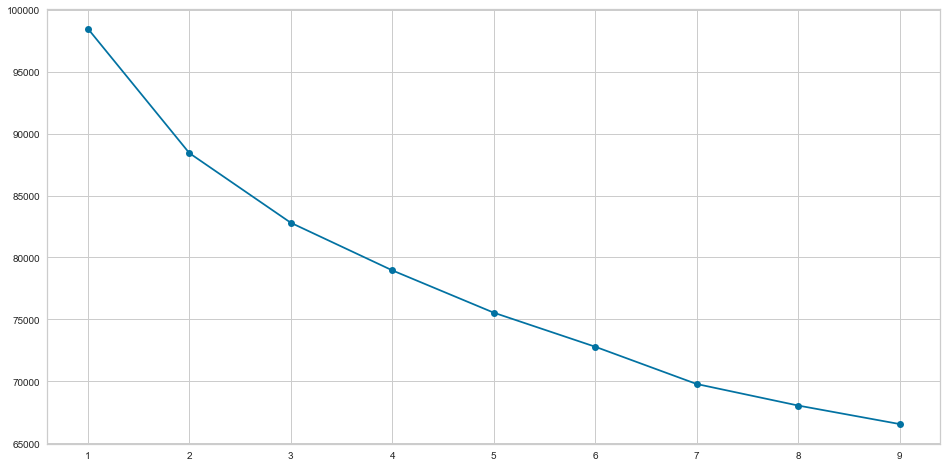

In [257]:
plt.figure(figsize = (16,8))
plt.plot(SSE_values['No.ofK'],SSE_values.SSE,marker = 'o')

In [258]:
clusters = KMeans(n_clusters=4,n_init=10)
clusters.fit(x)
labels = clusters.labels_
silvote = silhouette_score(x,labels=labels)
df1['Group'] = labels

In [259]:
range_n_clusters = range(2,10)

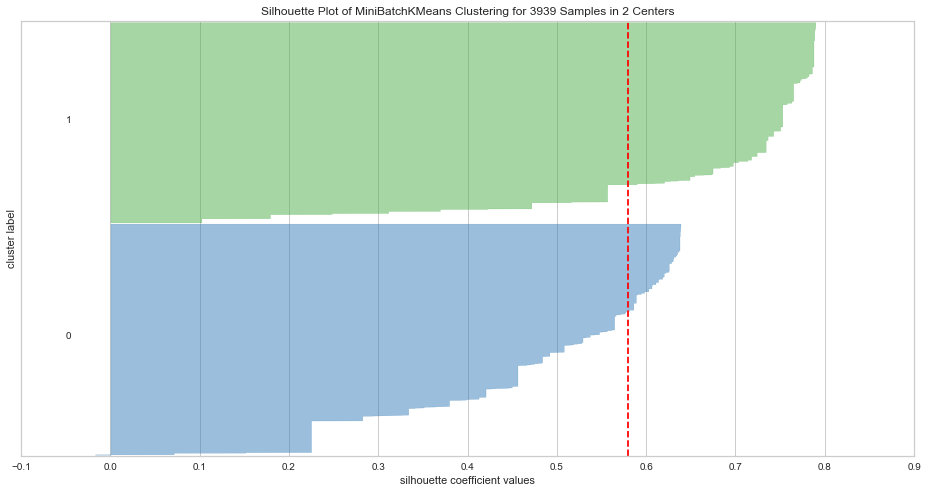

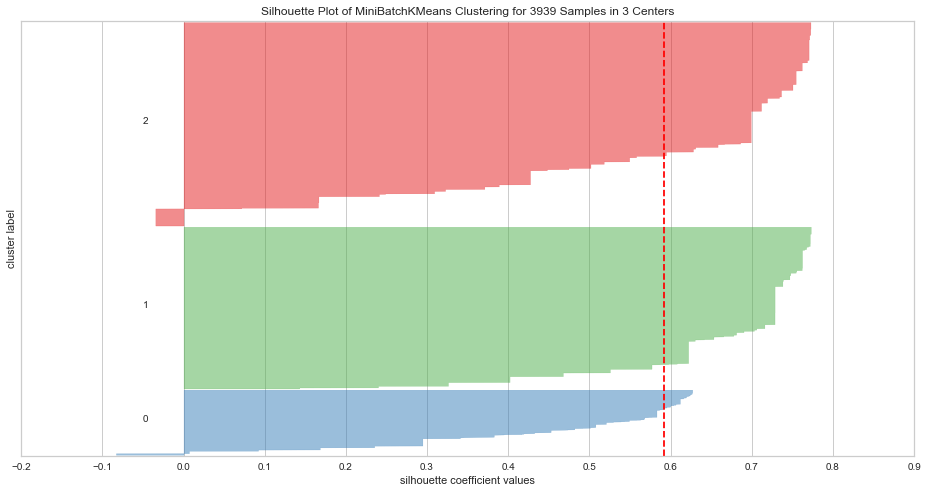

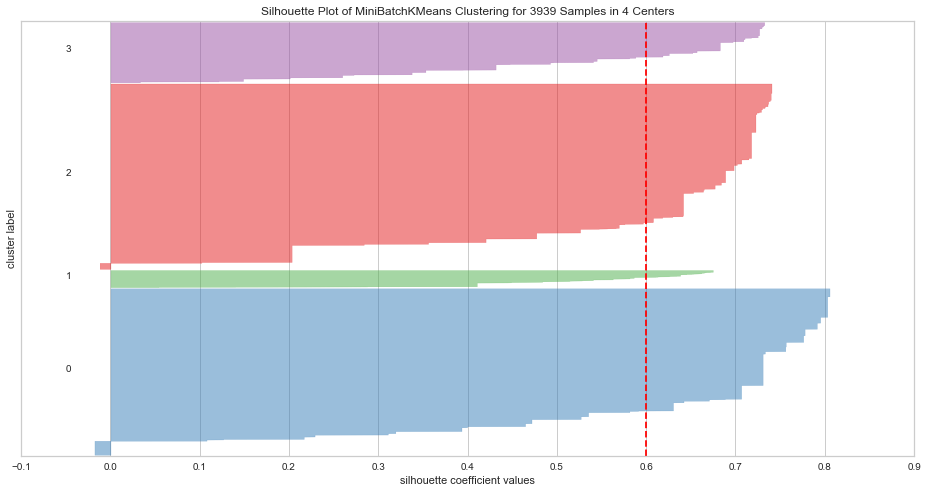

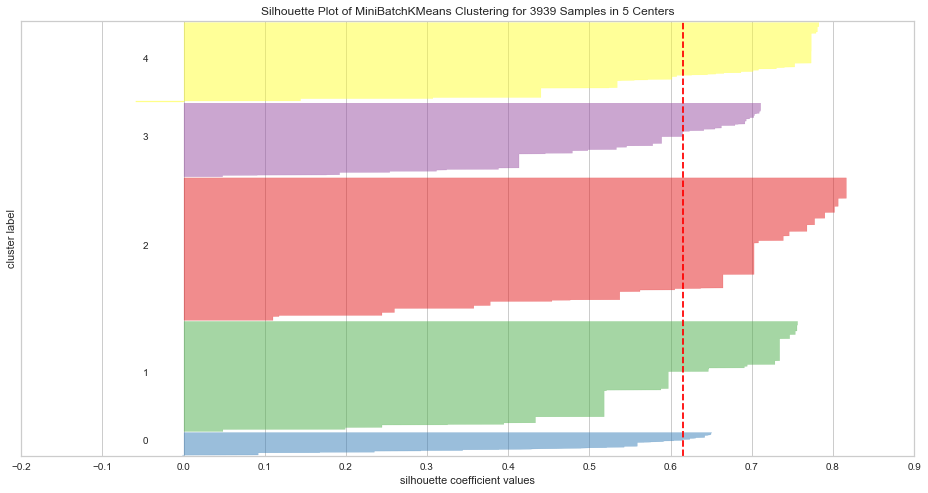

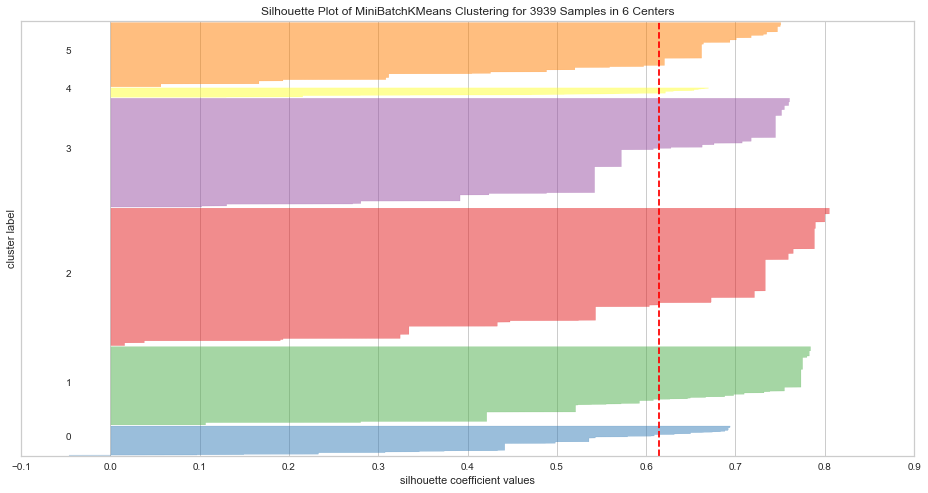

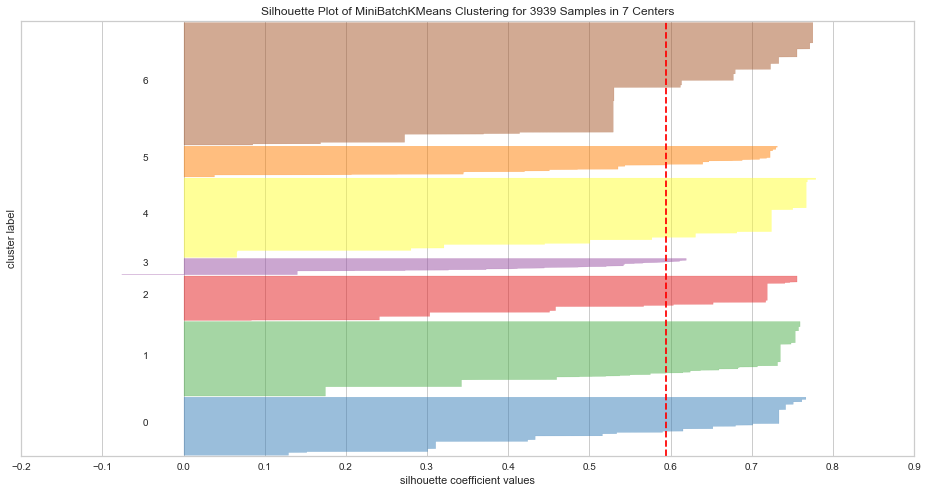

In [260]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,8):
    plt.figure(figsize=(16,8))
    model = MiniBatchKMeans(i)
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(df[['Salary']]) 
    visualizer.poof()

In [320]:
def sal(x):
    if x >= 600000:
        return 'High Package'
    elif x >= 350000  and x < 600000:
        return 'Medium'
    else:
        return 'Low Package'  

In [262]:
df['Salary'] = df['Salary'].apply(sal)
sal = LabelEncoder()
df['Salary'] = sal.fit_transform(df['Salary'])

In [263]:
sal.classes_

array(['High Package', 'Low Package'], dtype=object)

In [264]:
df['Salary'].unique()

array([1, 0], dtype=int64)

In [927]:
df[df['Salary']==2].count()['Salary']

0

In [265]:
df['Salary'].value_counts()

1    3732
0     207
Name: Salary, dtype: int64

In [266]:
df.corr()['Salary']

Salary                   1.000000
Gender                  -0.055288
10percentage            -0.095458
10board                 -0.003034
12graduation             0.155462
12percentage            -0.103961
12board                 -0.010151
CollegeTier             -0.166482
Degree                   0.010059
Specialization           0.008866
collegeGPA              -0.091472
CollegeState             0.051339
GraduationYear           0.174989
English                 -0.099860
Logical                 -0.108535
Quant                   -0.143075
Domain                  -0.103848
conscientiousness        0.063086
agreeableness           -0.015283
extraversion             0.041450
nueroticism              0.005135
openess_to_experience    0.012473
Aggregate Mean Marks    -0.112287
GAP_in_Grad             -0.021592
Age                     -0.137922
Name: Salary, dtype: float64

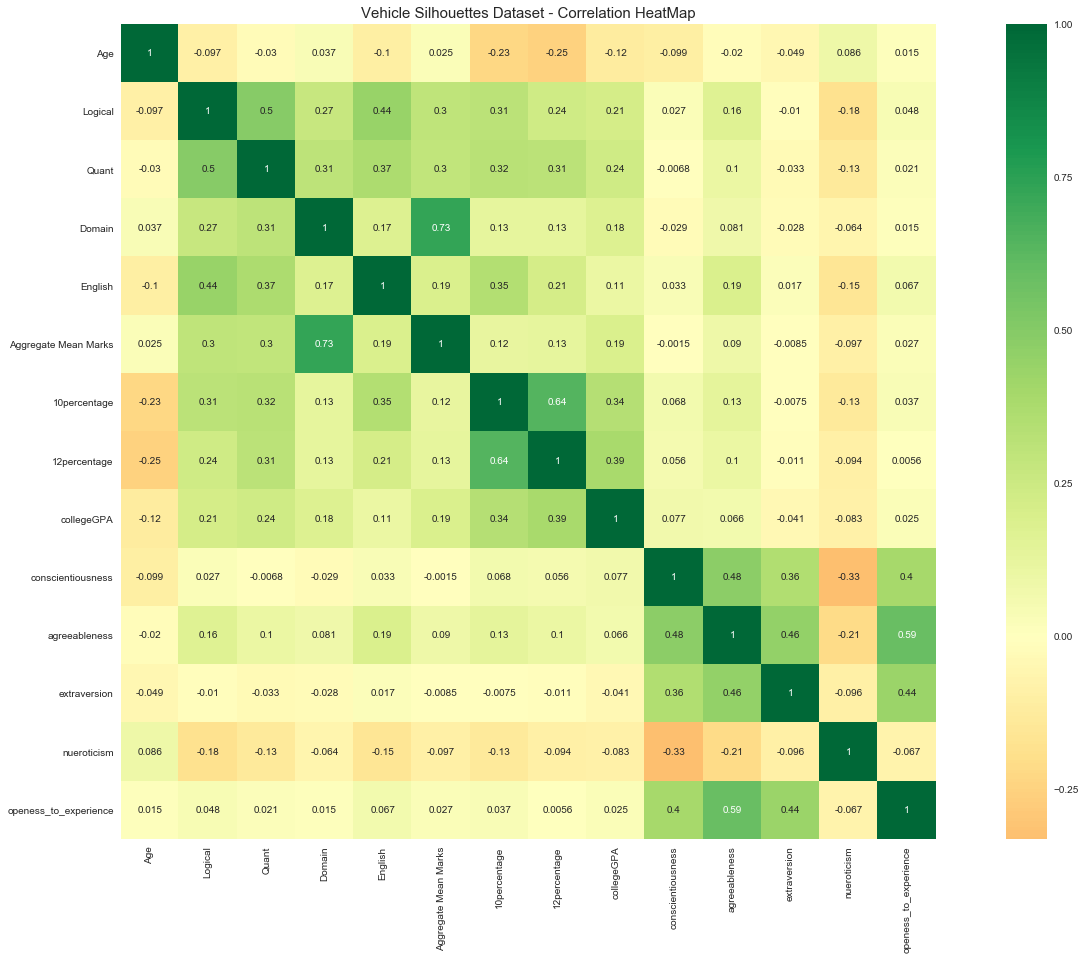

In [268]:
fig, ax = plt.subplots(figsize=(25,15))
title = "Vehicle Silhouettes Dataset - Correlation HeatMap"
plt.title(title, fontsize=15)
sns.heatmap(df1.corr(), annot=True, center=0, square=True, cmap='RdYlGn', ax=ax)
plt.show()

# Modelling

In [269]:
x = df[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad','Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
y = df[['Salary']]
sm = SMOTE(random_state=0)
x,y = sm.fit_resample(x, y)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
y['Salary'] = y[[0]] 
x[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad','Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']] = x[np.arange(0,24)]
x = x.drop(np.arange(0,24),axis = 1)
y = y.drop(0,axis = 1)

In [270]:
y['Salary'].value_counts()

1    3732
0    3732
Name: Salary, dtype: int64

In [271]:
print(y.shape,x.shape)

(7464, 1) (7464, 24)


In [272]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

[0.05734014 0.03353013 0.13407816 0.04359389 0.12723072 0.01564026
 0.00725783 0.02669702 0.14347146 0.02627415 0.08874342 0.03030487
 0.08051413 0.01143969 0.0430394  0.02097352 0.0388749  0.02451379
 0.01891004 0.00913441 0.00315096 0.00675397 0.0035841  0.00494905]


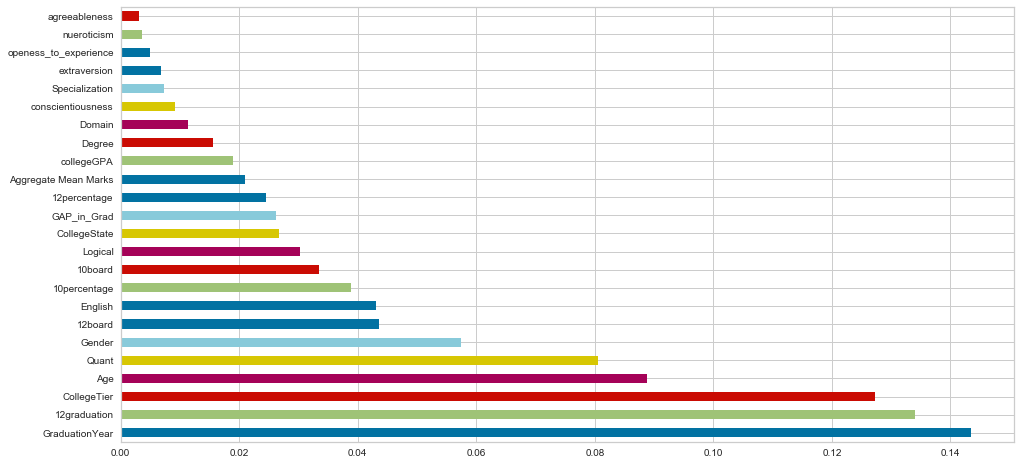

0.9125191424196019 0.9022321428571428


In [273]:
model = RandomForestClassifier(n_estimators=25,max_depth=5)
model.fit(x_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(16,8))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()
print(model.score(x_train,y_train),model.score(x_test,y_test))

In [274]:
df.head().T

,0,1,2,4,5
Salary,1.000000,1.000000,1.000000,1.000000,1.0000
Gender,0.000000,1.000000,0.000000,1.000000,1.0000
10percentage,84.300000,85.400000,85.000000,78.000000,89.9200
10board,2.000000,0.000000,0.000000,0.000000,2.0000
12graduation,4.000000,4.000000,7.000000,5.000000,7.0000
12percentage,95.800000,85.000000,68.200000,76.800000,87.0000
12board,2.000000,0.000000,0.000000,0.000000,2.0000
CollegeTier,0.000000,0.000000,0.000000,0.000000,0.0000
Degree,0.000000,0.000000,0.000000,0.000000,0.0000
Specialization,10.000000,21.000000,33.000000,21.000000,21.0000


In [275]:
df.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age'],
      dtype='object')

In [276]:
from statsmodels.formula.api import MNLogit,OLS
x_cont = x[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
#sc = StandardScaler()
#x = sc.fit_transform(x)
result = MNLogit(y,x_cont)
model = result.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.633778
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Salary   No. Observations:                 7464
Model:                        MNLogit   Df Residuals:                     7450
Method:                           MLE   Df Model:                           13
Date:                Sun, 18 Aug 2019   Pseudo R-squ.:                 0.08565
Time:                        15:26:28   Log-Likelihood:                -4730.5
converged:                       True   LL-Null:                       -5173.7
                                        LLR p-value:                4.505e-181
=========================================================================================
             Salary=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.0171      0.009      1.986      0.047       0.000       0.034
Logical                   0.0009      0.000      2.537      0.011       0.000       0.002
Quant                    -0.0039      0.000    -13.866      0.000      -0.004      -0.003
Domain                   -0.7312      0.130     -5.603      0.000      -0.987      -0.475
English                4.009e-05      0.000      0.138      0.891      -0.001       0.001
Aggregate Mean Marks     -0.0006      0.000     -1.890      0.059      -0.001    2.23e-05
10percentage              0.0106      0.004      2.774      0.006       0.003       0.018
12percentage             -0.0155      0.003     -4.688      0.000      -0.022      -0.009
collegeGPA                0.3116      0.037      8.465      0.000       0.239       0.384
conscientiousness         0.3968      0.033     12.200      0.000       0.333       0.461
agreeableness            -0.3475      0.041     -8.411      0.000      -0.428      -0.267
extraversion              0.2365      0.034      7.044      0.000       0.171       0.302
nueroticism               0.1023      0.029      3.485      0.000       0.045       0.160
openess_to_experience    -0.0130      0.036     -0.365      0.715      -0.083       0.057
=========================================================================================
"""

In [277]:
from sklearn.feature_selection import chi2
x_cat = x[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad']]
chi_score,p_value = chi2(x_cat,y)
pvalue = []
for i in p_value:
    a = round(i,10)
    pvalue.append(a)
PTable_Chi2 = pd.DataFrame({'Features':x_cat.columns,'P value':pvalue})
PTable_Chi2

,Features,P value
0,Gender,0.000032
1,10board,0.043084
2,12graduation,0.000000
3,12board,0.005621
4,CollegeTier,0.000000
5,Degree,0.000054
6,Specialization,0.000000
7,CollegeState,0.000000
8,GraduationYear,0.000000
9,GAP_in_Grad,0.000002


In [319]:
x_cont = x[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
pca = PCA(n_components=3)
pca.fit(x_cont)
X_pca = pd.DataFrame(pca.transform(x_cont))

KeyError: "['Age' 'Logical' 'Quant' 'Domain' 'English' 'Aggregate Mean Marks'\n '10percentage' '12percentage' 'collegeGPA' 'conscientiousness'\n 'agreeableness' 'extraversion' 'nueroticism' 'openess_to_experience'] not in index"

In [279]:
X_pca.head()

,0,1,2
0,-13.167581,-2.909287,18.931765
1,-267.923178,134.825905,-30.888433
2,77.622885,26.778140,186.432581
3,107.260498,176.716991,59.886168
4,-121.797022,-29.825491,-10.028345


In [280]:
pca.components_

array([[ 8.52143821e-04, -3.90103815e-01, -5.99734243e-01,
        -1.08322713e-03, -4.50659054e-01, -5.32853164e-01,
        -2.27116747e-02, -2.42746829e-02, -1.71952657e-03,
         3.48336799e-04, -8.49716656e-04,  5.35227129e-04,
         8.01145866e-04, -2.56971070e-04],
       [-2.40772515e-03,  2.02473258e-01,  2.93673451e-01,
        -1.32855087e-03,  4.19073506e-01, -8.34615081e-01,
         1.96245368e-02,  1.27390019e-02,  2.69403703e-04,
         5.19662450e-04,  1.31769563e-04, -3.40768509e-04,
        -3.12589052e-04,  8.04240094e-05],
       [-1.59074618e-03,  1.14272302e-01, -7.04049830e-01,
        -5.73433970e-05,  6.89365071e-01,  1.26060764e-01,
         3.89881257e-03, -1.09055170e-02, -1.32293123e-03,
        -2.84323600e-04,  1.13858406e-03,  2.42506570e-04,
        -5.35176479e-04,  1.49346727e-04]])

In [281]:
pca.explained_variance_

array([25814.74464661, 10623.94926099,  6902.96120144])

In [282]:
pca.explained_variance_ratio_

array([0.54497921, 0.22428389, 0.14572952])

In [283]:
x = x.drop(['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],axis = 1)

In [284]:
x['PC1'] = X_pca[0]
x['PC2'] = X_pca[1]
x['PC3'] = X_pca[2]

In [285]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 13 columns):
Gender            7464 non-null float64
10board           7464 non-null float64
12graduation      7464 non-null float64
12board           7464 non-null float64
CollegeTier       7464 non-null float64
Degree            7464 non-null float64
Specialization    7464 non-null float64
CollegeState      7464 non-null float64
GraduationYear    7464 non-null float64
GAP_in_Grad       7464 non-null float64
PC1               7464 non-null float64
PC2               7464 non-null float64
PC3               7464 non-null float64
dtypes: float64(13)
memory usage: 758.1 KB


In [286]:
x.head()

,Gender,10board,12graduation,12board,CollegeTier,Degree,Specialization,CollegeState,GraduationYear,GAP_in_Grad,PC1,PC2,PC3
0,0.0,2.0,4.0,2.0,0.0,0.0,10.0,0.0,3.0,0.0,-13.167581,-2.909287,18.931765
1,1.0,0.0,4.0,0.0,0.0,0.0,21.0,13.0,4.0,1.0,-267.923178,134.825905,-30.888433
2,0.0,0.0,7.0,0.0,0.0,0.0,33.0,23.0,6.0,0.0,77.622885,26.778140,186.432581
3,1.0,0.0,5.0,0.0,0.0,0.0,21.0,23.0,4.0,0.0,107.260498,176.716991,59.886168
4,1.0,2.0,7.0,2.0,0.0,0.0,21.0,11.0,6.0,0.0,-121.797022,-29.825491,-10.028345


In [287]:
x.columns

Index(['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'CollegeState', 'GraduationYear', 'GAP_in_Grad',
       'PC1', 'PC2', 'PC3'],
      dtype='object')

In [288]:
y.columns

Index(['Salary'], dtype='object')

In [289]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [290]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [291]:
log.score(x_train,y_train)

0.7838820826952527

In [292]:
log.score(x_test,y_test)

0.7790178571428571

In [293]:
y_pred = log.predict(x_test)

In [294]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[906 231]
 [264 839]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1137
           1       0.78      0.76      0.77      1103

    accuracy                           0.78      2240
   macro avg       0.78      0.78      0.78      2240
weighted avg       0.78      0.78      0.78      2240



In [295]:
df.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age'],
      dtype='object')

In [318]:
xgb = XGBClassifier(learning_rate = .1,n_estimator=20,scale_pos_weight=2)
xgb.fit(x_train,y_train)
print(f'{xgb.score(x_train,y_train)} , {xgb.score(x_test,y_test)}')

ValueError: Found input variables with inconsistent numbers of samples: [2488, 1496]

In [317]:
y_pred2 = xgb.predict(x_test)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23']
training data did not have the following fields: f17, f19, f13, f23, f18, f22, f20, f15, f21, f16, f14

In [315]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.9721790890269151


ValueError: Found input variables with inconsistent numbers of samples: [2488, 2240]

In [299]:
model1 = RandomForestClassifier(n_estimators=15,max_depth=5,random_state=0)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [300]:
model1.score(x_train,y_train)

0.9163476263399694

In [301]:
model1.score(x_test,y_test)

0.9049107142857142

In [302]:
y_pred = model1.predict(x_test)

In [316]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9721790890269151


ValueError: Found input variables with inconsistent numbers of samples: [2488, 1496]

In [895]:
#Logistic Regression
model1=LogisticRegression()
model1_bagged = BaggingClassifier(base_estimator=model1,n_estimators=7,random_state=0)
model1_ADAboost = AdaBoostClassifier(base_estimator=model1,n_estimators=50,random_state=0)

#K-neighbors
model2=KNeighborsClassifier(n_neighbors=3,weights = 'distance')
model2_bagged = BaggingClassifier(base_estimator=model2,n_estimators=3,random_state=0)

#Gausian NB
model3= GaussianNB()
model3_bagged = BaggingClassifier(base_estimator=model3,n_estimators=7,random_state=0)
model3_ADAboost = AdaBoostClassifier(base_estimator=model3,n_estimators=50,random_state=0)

#Random Forest
model4 = RandomForestClassifier(n_estimators=21,criterion='entropy',random_state=0)
model4_ADAboost = AdaBoostClassifier(base_estimator=model4,n_estimators=50,random_state=0)

#Decision Tree
model5_bagged = BaggingClassifier(n_estimators=10,random_state=0)  
model5_Gradient = GradientBoostingClassifier(n_estimators=150,random_state = 0)

kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([model1,model1_bagged,model1_ADAboost,model2,model2_bagged,model3,model3_bagged,model3_ADAboost,model4,model4_ADAboost,model5_bagged,model5_Gradient],
                      ['LR','LR_Bag','LR_Boost','KN','KN_Bag','NB','NB_Bag','NB_Boost','RF','RF_Boost','DT_Bag','DT_Boost']):
    k=0
    recall = np.zeros((3,3))
    prec = np.zeros((3,3))
    fscore = np.zeros((3,3))
    for train,test in kf.split(x,y):
        x_train,x_test=x.iloc[train,:],x.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        cm = confusion_matrix(y_test,y_pred)
        for i in np.arange(0,3):
            recall[i,k] = cm[i,i]/cm[i,:].sum()
        for i in np.arange(0,3):
            prec[i,k] = cm[i,i]/cm[:,i].sum()
        k=k+1
    for row in np.arange(0,3):
        for col in np.arange(0,3):
            fscore[row,col] = 2*(recall[row,col]*prec[row,col])/(recall[row,col]+prec[row,col])
    m1 = np.mean(fscore[0,:])
    m2 = np.mean(fscore[1,:])
    m3 = np.mean(fscore[2,:])
    v1 = np.var(fscore[0,:],ddof = 1)
    v2 = np.var(fscore[1,:],ddof = 1)
    v3 = np.var(fscore[2,:],ddof = 1)
    print("[%s]:mean = %0.02f variance = (+/- %0.5f)"% (name,np.mean([m1,m2,m3]),np.var([v1,v2,v3],ddof = 1)))

IndexError: index 2 is out of bounds for axis 0 with size 2

### Binary Classification

In [ ]:
def sal(x):
    if x >= 421000:
        return 'High Package'
    elif x>= 193000 and x < 300000:
        return 'Medium'
    else:
        return 'Low Package'  

In [ ]:
df['Salary'] = df['Salary'].apply(sal)
sal = LabelEncoder()
df['Salary'] = sal.fit_transform(df['Salary'])

In [ ]:
sal.classes_

In [ ]:
df['Salary'].unique()

In [ ]:
df['Salary'].value_counts()

In [ ]:
df.corr()['Salary']

In [ ]:
df1 = df[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',

In [ ]:
df1 = df[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
title = "Vehicle Silhouettes Dataset - Correlation HeatMap"
plt.title(title, fontsize=15)
sns.heatmap(df1.corr(), annot=True, center=0, square=True, cmap='RdYlGn', ax=ax)
plt.show()

### Modelling

In [ ]:
x = df[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad','Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
y = df[['Salary']]
sm = SMOTE(random_state=0)
x,y = sm.fit_resample(x, y)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
y['Salary'] = y[[0]] 
x[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad','Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']] = x[np.arange(0,24)]
x = x.drop(np.arange(0,24),axis = 1)
y = y.drop(0,axis = 1)

In [ ]:
y['Salary'].value_counts()

In [ ]:
print(y.shape,x.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = RandomForestClassifier(n_estimators=25,max_depth=5)
model.fit(x_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(16,8))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()
print(model.score(x_train,y_train),model.score(x_test,y_test))

In [ ]:
df.head().T

In [ ]:
df.columns

In [ ]:
from statsmodels.formula.api import MNLogit,OLS
x_cont = x[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
#sc = StandardScaler()
#x = sc.fit_transform(x)
result = MNLogit(y,x_cont)
model = result.fit()
model.summary()

In [ ]:
from sklearn.feature_selection import chi2
x_cat = x[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad']]
chi_score,p_value = chi2(x_cat,y)
pvalue = []
for i in p_value:
    a = round(i,10)
    pvalue.append(a)
PTable_Chi2 = pd.DataFrame({'Features':x_cat.columns,'P value':pvalue})
PTable_Chi2

In [ ]:
x_cont = x[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
pca = PCA(n_components=3)
pca.fit(x_cont)
X_pca = pd.DataFrame(pca.transform(x_cont))

In [ ]:
X_pca.head()

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
x = x.drop(['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],axis = 1)

In [ ]:
x['PC1'] = X_pca[0]
x['PC2'] = X_pca[1]
x['PC3'] = X_pca[2]

In [ ]:
x.info()

In [ ]:
x.head()

In [ ]:
x.columns

In [ ]:
y.columns

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)

In [ ]:
log.score(x_train,y_train)

In [ ]:
log.score(x_test,y_test)

In [ ]:
y_pred = log.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
xgb = XGBClassifier(learning_rate = .1,n_estimator=20,scale_pos_weight=2)
xgb.fit(x_train,y_train)
print(f'{xgb.score(x_train,y_train)} , {xgb.score(x_test,y_test)}')

In [ ]:
y_pred2 = xgb.predict(x_test)
fpr,tpr,_= roc_curve(y_test,y_pred2)

In [ ]:
print(auc(fpr,tpr))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

In [ ]:
model1 = RandomForestClassifier(n_estimators=15,max_depth=5,random_state=0)
model1.fit(x_train,y_train)

In [ ]:
model1.score(x_train,y_train)

In [ ]:
model1.score(x_test,y_test)

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
print(auc(fpr,tpr))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#Logistic Regression
model1=LogisticRegression()
model1_bagged = BaggingClassifier(base_estimator=model1,n_estimators=7,random_state=0)
model1_ADAboost = AdaBoostClassifier(base_estimator=model1,n_estimators=50,random_state=0)

#K-neighbors
model2=KNeighborsClassifier(n_neighbors=3,weights = 'distance')
model2_bagged = BaggingClassifier(base_estimator=model2,n_estimators=3,random_state=0)

#Gausian NB
model3= GaussianNB()
model3_bagged = BaggingClassifier(base_estimator=model3,n_estimators=7,random_state=0)
model3_ADAboost = AdaBoostClassifier(base_estimator=model3,n_estimators=50,random_state=0)

#Random Forest
model4 = RandomForestClassifier(n_estimators=21,criterion='entropy',random_state=0)
model4_ADAboost = AdaBoostClassifier(base_estimator=model4,n_estimators=50,random_state=0)

#Decision Tree
model5_bagged = BaggingClassifier(n_estimators=10,random_state=0)  
model5_Gradient = GradientBoostingClassifier(n_estimators=150,random_state = 0)

rock = []
model_names = []
kf=KFold(n_splits=3,shuffle=True,random_state=1)
for model,name in zip([model1,model1_bagged,model1_ADAboost,model2,model2_bagged,model3,model3_bagged,model3_ADAboost,model4,model4_ADAboost,model5_bagged,model5_Gradient],
                      ['LR','LR_Bag','LR_Boost','KN','KN_Bag','NB','NB_Bag','NB_Boost','RF','RF_Boost','DT_Bag','DT_Boost']):
    roc_auc=[] 
    for train,test in kf.split(x,y):
        x_train,x_test=x.iloc[train,:],x.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        fpr,tpr,_= roc_curve(y_test,y_pred)
        roc_auc.append(auc(fpr,tpr))
        rock.append(auc(fpr,tpr))
    model_names.append(name)
    print('AUC scores : %.06f (+/- %.06f) [%s]'% (np.mean(roc_auc),np.var(roc_auc,ddof=1),name))
dg = np.array_split(rock,len(model_names))
rocs = pd.DataFrame(dg,index=model_names)
fig = plt.figure(figsize = (16,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) 
plt.boxplot(rocs)
ax.set_xticklabels(model_names)
plt.grid()
plt.show() 

In [305]:
df_test = pd.read_excel('C:/Users/sumit/Sumit DATA/datasets/Project/Cleantestdata1.xlsx')

In [306]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495
Gender,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10percentage,75.000000,83.000000,85.200000,81.800000,78.000000,87.000000,79.20000,67.000000,90.560000,73.800000,...,79.00000,91.800000,78.000000,75.160000,66.600000,82.880000,87.000000,84.500000,63.330000,66.000000
10board,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.00000,2.000000,3.000000,0.000000,...,1.00000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
12graduation,6.000000,6.000000,7.000000,7.000000,4.000000,4.000000,7.00000,4.000000,5.000000,7.000000,...,7.00000,5.000000,3.000000,6.000000,1.000000,5.000000,6.000000,3.000000,5.000000,5.000000
12percentage,74.000000,75.000000,91.400000,80.800000,78.000000,68.400000,73.73000,73.000000,83.330000,74.000000,...,67.30000,88.200000,59.000000,75.400000,65.800000,79.160000,78.000000,84.200000,67.000000,54.500000
12board,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.00000,2.000000,3.000000,0.000000,...,0.00000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
CollegeTier,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Degree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Specialization,20.000000,29.000000,29.000000,29.000000,11.000000,11.000000,20.00000,10.000000,32.000000,29.000000,...,29.00000,20.000000,20.000000,13.000000,20.000000,11.000000,22.000000,29.000000,13.000000,32.000000
collegeGPA,7.070000,7.480000,8.470000,7.410000,7.470000,7.390000,7.46000,7.680000,8.850000,8.110000,...,7.05000,9.380000,6.950000,8.110000,7.840000,8.560000,8.110000,7.590000,6.410000,7.890000


In [307]:
df_test.columns

Index(['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age'],
      dtype='object')

In [308]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,7454,7455,7456,7457,7458,7459,7460,7461,7462,7463
Gender,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.832109,0.265887,1.000000,1.000000,1.000000,0.000000,0.000000,0.948547
10board,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.067786,1.894806,2.000000,2.000000,2.827923,2.000000,0.000000,0.000000,2.093572,0.154359
12graduation,4.000000,4.000000,7.000000,5.000000,7.000000,7.000000,7.000000,6.000000,7.000000,3.000000,...,3.135572,4.000000,0.839457,3.000000,3.655845,5.597419,5.000000,6.710222,4.906428,3.051453
12board,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.135572,1.894806,2.000000,0.531774,2.827923,2.000000,0.000000,0.000000,2.093572,0.154359
CollegeTier,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.067786,0.000000,0.000000,0.000000,0.172077,0.000000,1.000000,1.000000,0.000000,0.000000
Degree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.812857,0.000000
Specialization,10.000000,21.000000,33.000000,21.000000,21.000000,13.000000,39.000000,23.000000,21.000000,10.000000,...,23.796642,16.316019,10.000000,18.075245,13.957781,11.792256,33.000000,19.085338,11.216431,10.000000
CollegeState,0.000000,13.000000,23.000000,23.000000,11.000000,11.000000,20.000000,4.000000,25.000000,13.000000,...,22.593284,9.526407,23.000000,11.000000,11.516232,18.169026,11.078618,17.494218,1.497146,18.000000
GraduationYear,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,8.000000,5.000000,6.000000,2.000000,...,3.000000,3.000000,2.503674,2.000000,2.827923,4.597419,4.786513,5.710222,5.719285,2.051453
GAP_in_Grad,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.932214,0.000000,2.664217,0.000000,0.172077,0.000000,0.786513,0.000000,0.000000,0.000000


In [309]:
x_train = df[['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age']]
x_test = df_test[['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age']]
y_train = df[['Salary']]

In [310]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [311]:
log = LogisticRegression(multi_class='multinomial',solver='newton-cg')
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [312]:
log.score(x_train,y_train)

0.9456714902259457

In [313]:
y_pred = pd.Series(log.predict(df_test))

In [314]:
y_pred.unique()

array([0], dtype=int64)